In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

data = pd.read_csv('../sql/K6_UNEMPLOYED_RESIDENTS_BY_MARITAL_STATUS_AND_SEX.csv')
# data = pd.read_csv('../sql/K15T_UNEMPLOYED_RESIDENTS_BY_PREVIOUS_OCCUPATION_AND_SEX.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marital_Status  6 non-null      object 
 1   2014            6 non-null      float64
 2   2015            6 non-null      float64
 3   2016            6 non-null      float64
 4   2017            6 non-null      float64
 5   2018            6 non-null      float64
 6   2019            6 non-null      float64
 7   2020            6 non-null      float64
 8   2021            6 non-null      float64
 9   2022            6 non-null      float64
 10  2023            6 non-null      float64
 11  2024            6 non-null      float64
 12  Gender          6 non-null      object 
 13  Group           6 non-null      object 
 14  Status          6 non-null      object 
dtypes: float64(11), object(4)
memory usage: 852.0+ bytes


In [3]:
data.nunique()

# Drop columns with only 1 unique value
col_only_single_unique = [col for col in data.columns if data[col].nunique()==1]
data.drop(col_only_single_unique, axis =1, inplace = True)
data.head()

,Marital_Status,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Gender
0,Single,21.4,22.8,22.0,24.1,22.1,25.0,28.4,24.3,19.2,19.4,19.3,Male
1,Married,18.1,18.8,21.7,22.2,22.0,21.4,29.6,27.0,22.1,19.4,21.3,Male
2,Widowed / Divorced,2.0,2.7,2.4,3.0,2.3,2.1,4.0,3.9,2.8,2.6,2.9,Male
3,Single,19.7,19.6,22.4,22.3,20.4,23.6,30.0,26.0,18.6,20.0,15.7,Female
4,Married,17.6,17.0,20.7,19.9,18.1,21.9,24.7,26.1,20.4,18.8,17.9,Female


In [4]:
## Convert to long form

cat_list = [col for col in data.columns if data[col].dtype == object]

df_long = data.melt(
    id_vars=cat_list,
    value_vars=[str(year) for year in range(2014, 2025)],
    var_name="Year",
    value_name="Count"
)
df_long.head()

,Marital_Status,Gender,Year,Count
0,Single,Male,2014,21.4
1,Married,Male,2014,18.1
2,Widowed / Divorced,Male,2014,2.0
3,Single,Female,2014,19.7
4,Married,Female,2014,17.6


### Univariate Analysis (Single Variable)

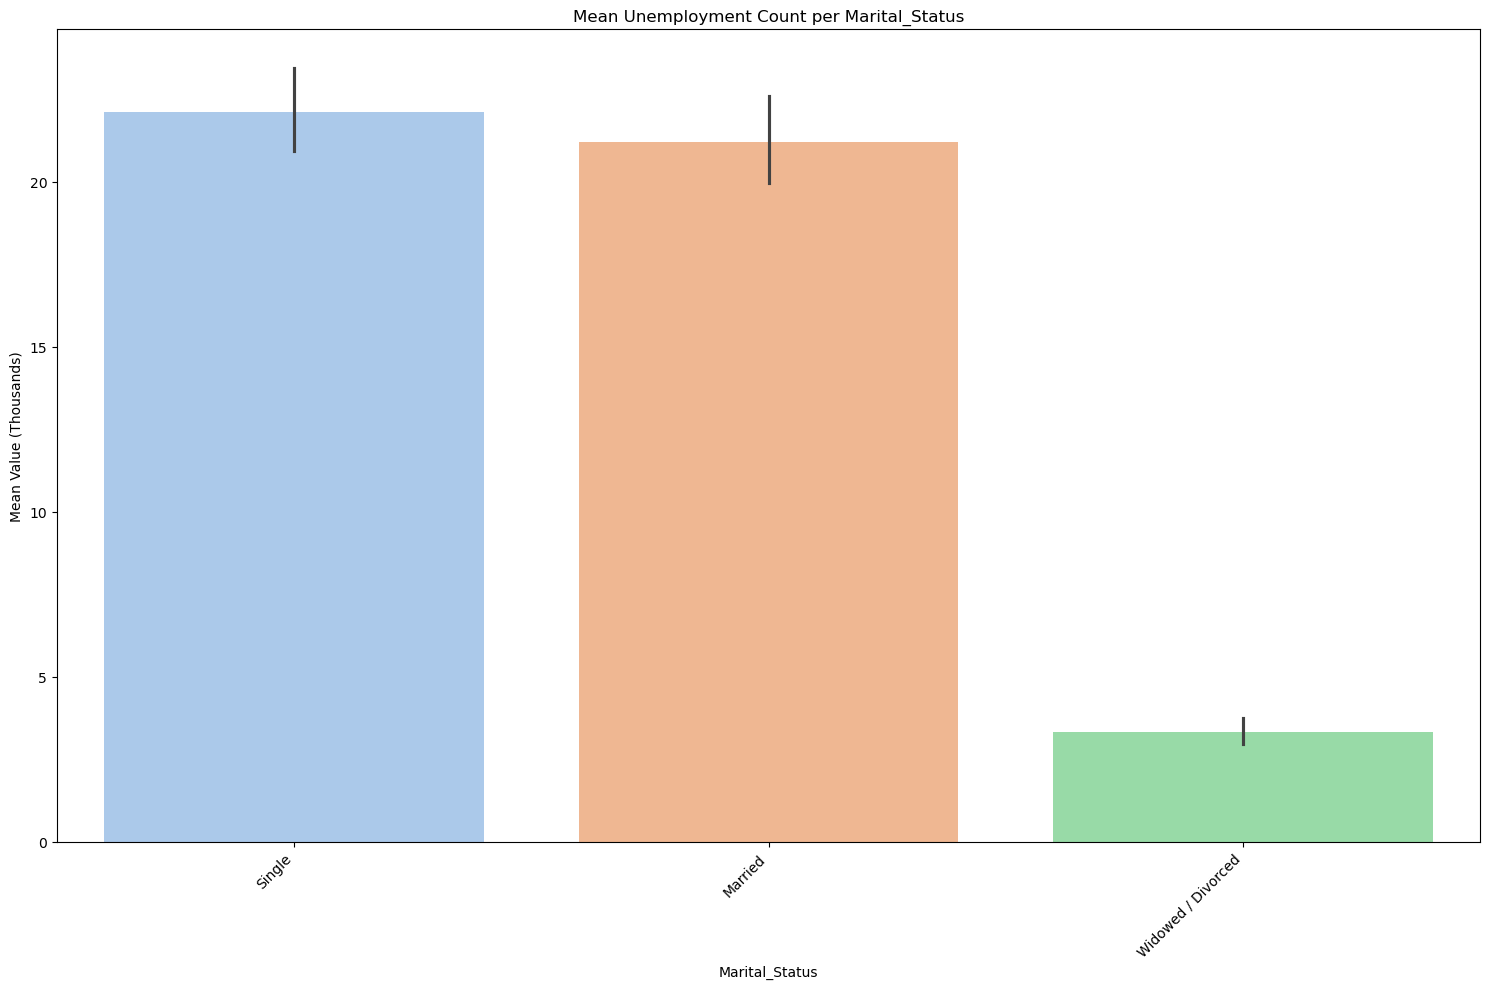

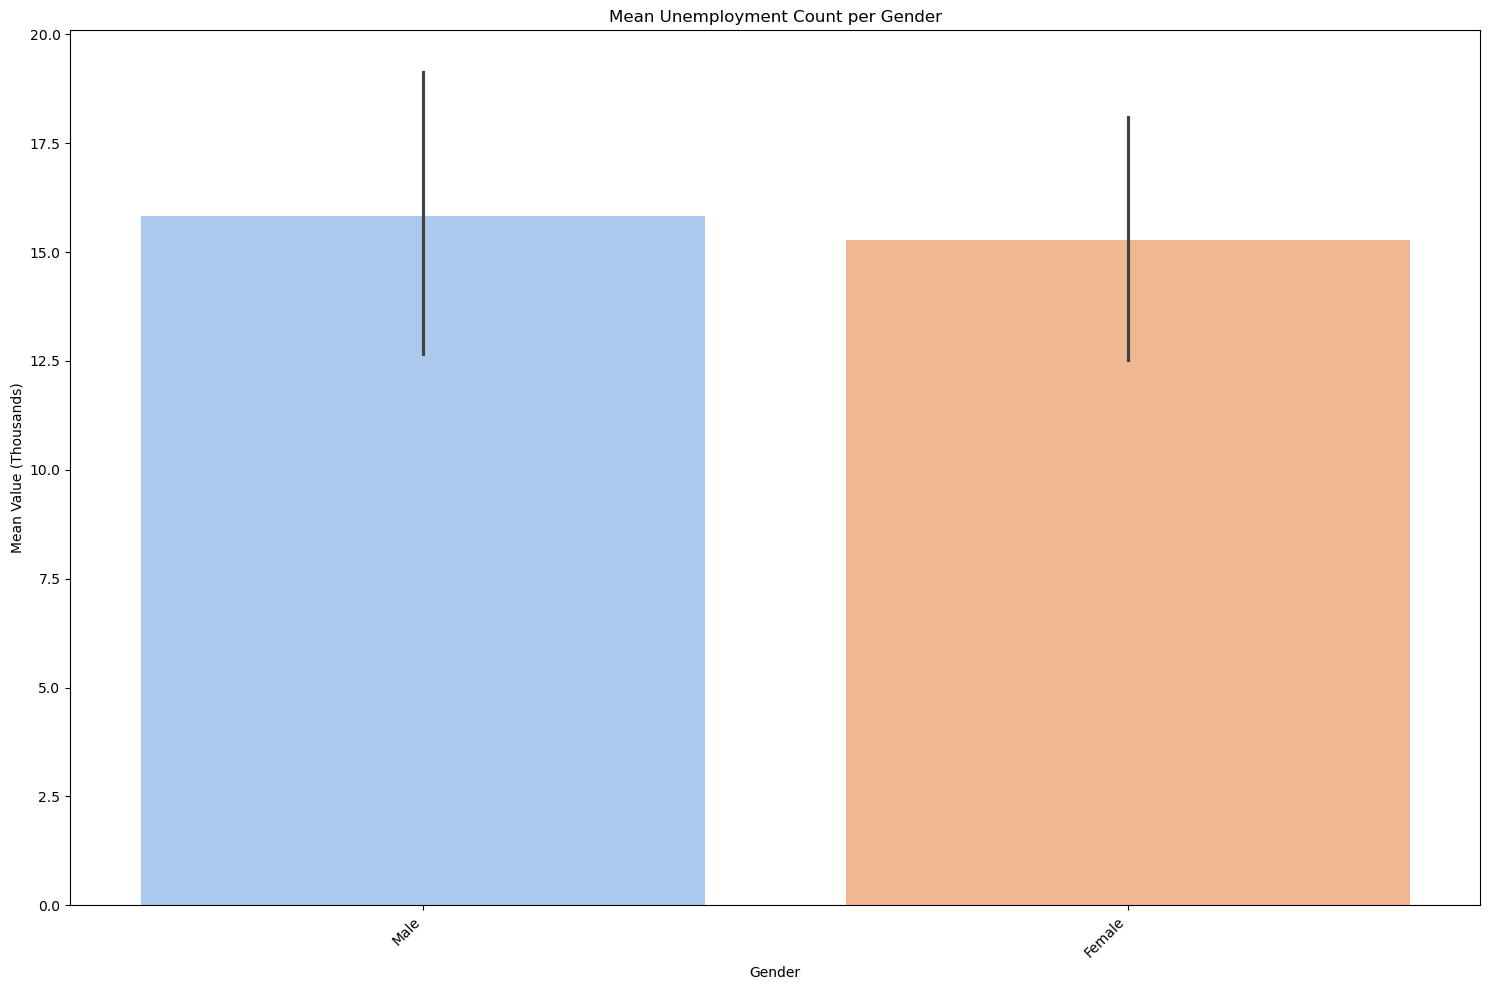

In [5]:
for col in cat_list:
    # y-axis to be Count

    ###-------------------------------------------------------------------####
    ### ---- Bar Plot – For categorical variables (mean of numerical) --- ####
    ###-------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.barplot(x=col, y='Count', hue=col, data=df_long, estimator='mean', palette='pastel' , legend=False)
    plt.title(f"Mean Unemployment Count per {col}")
    plt.xlabel(col)
    plt.ylabel("Mean Value (Thousands)")

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()


### Bivariate Analysis (Two Variables)

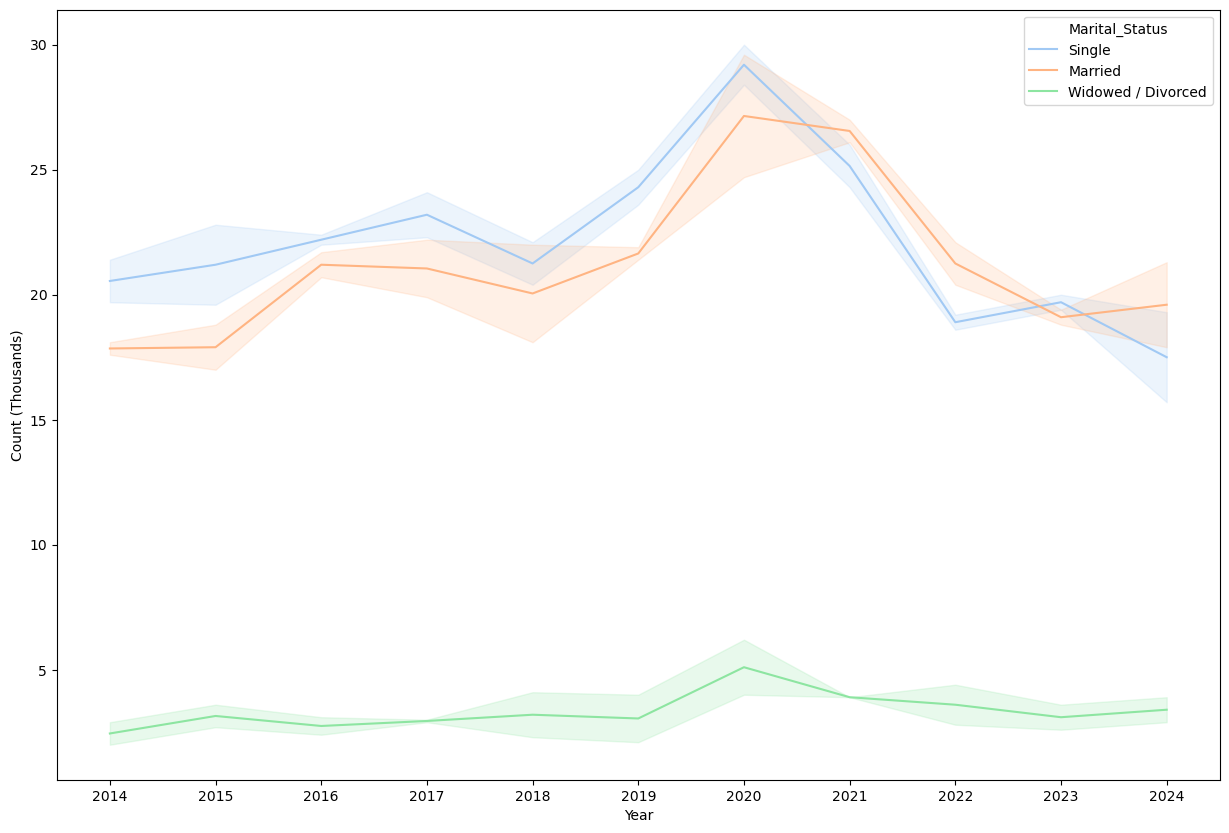

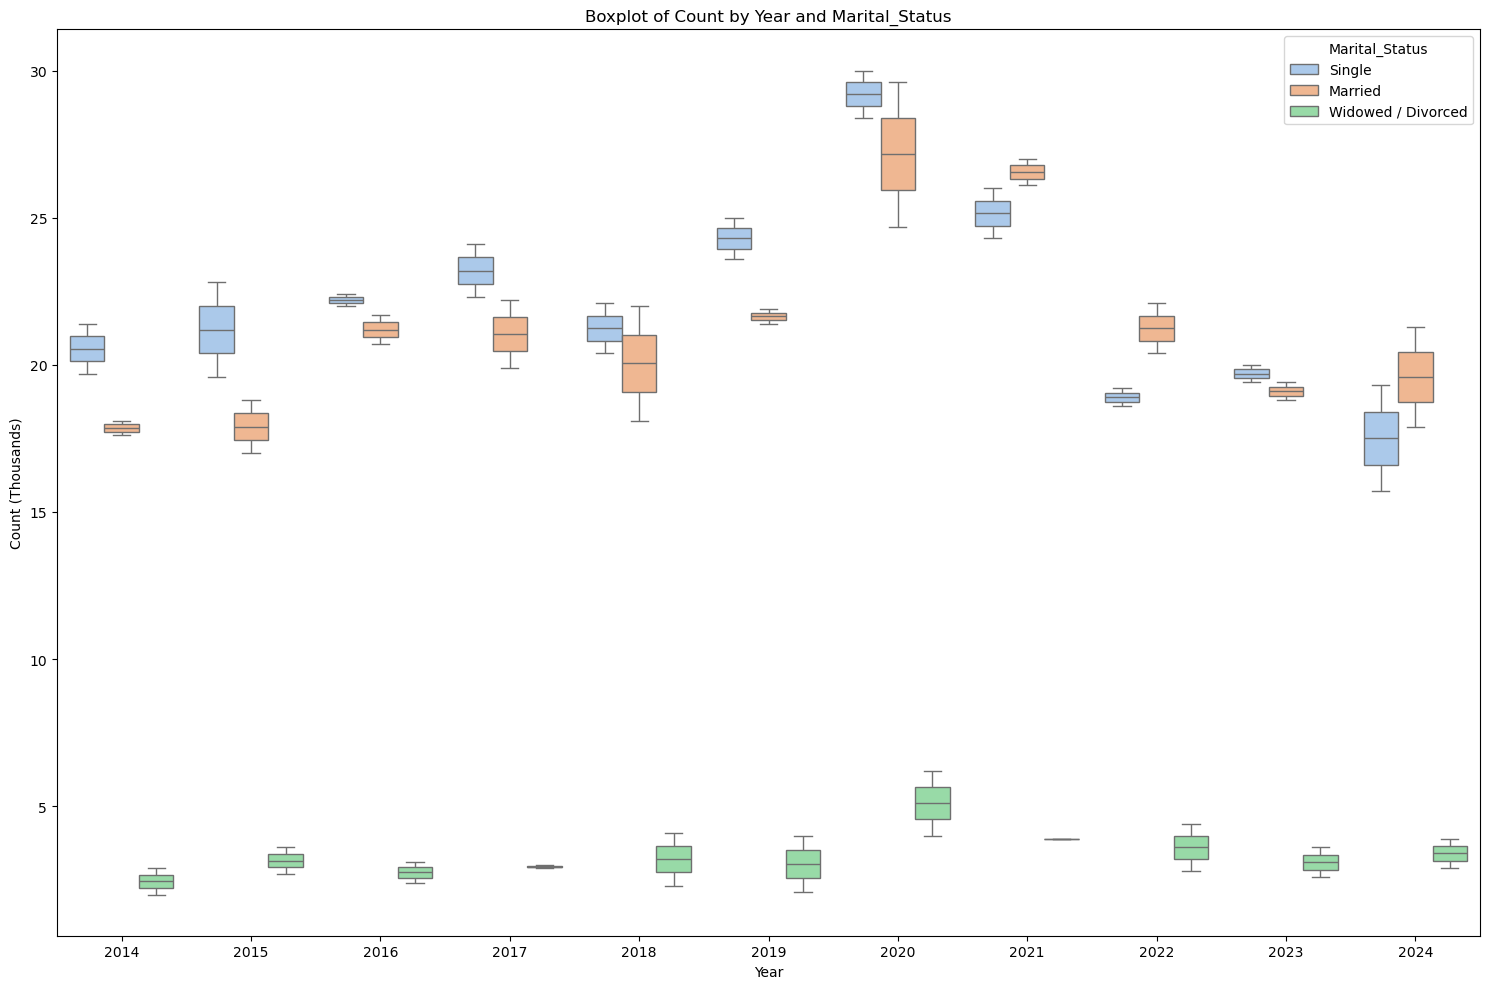

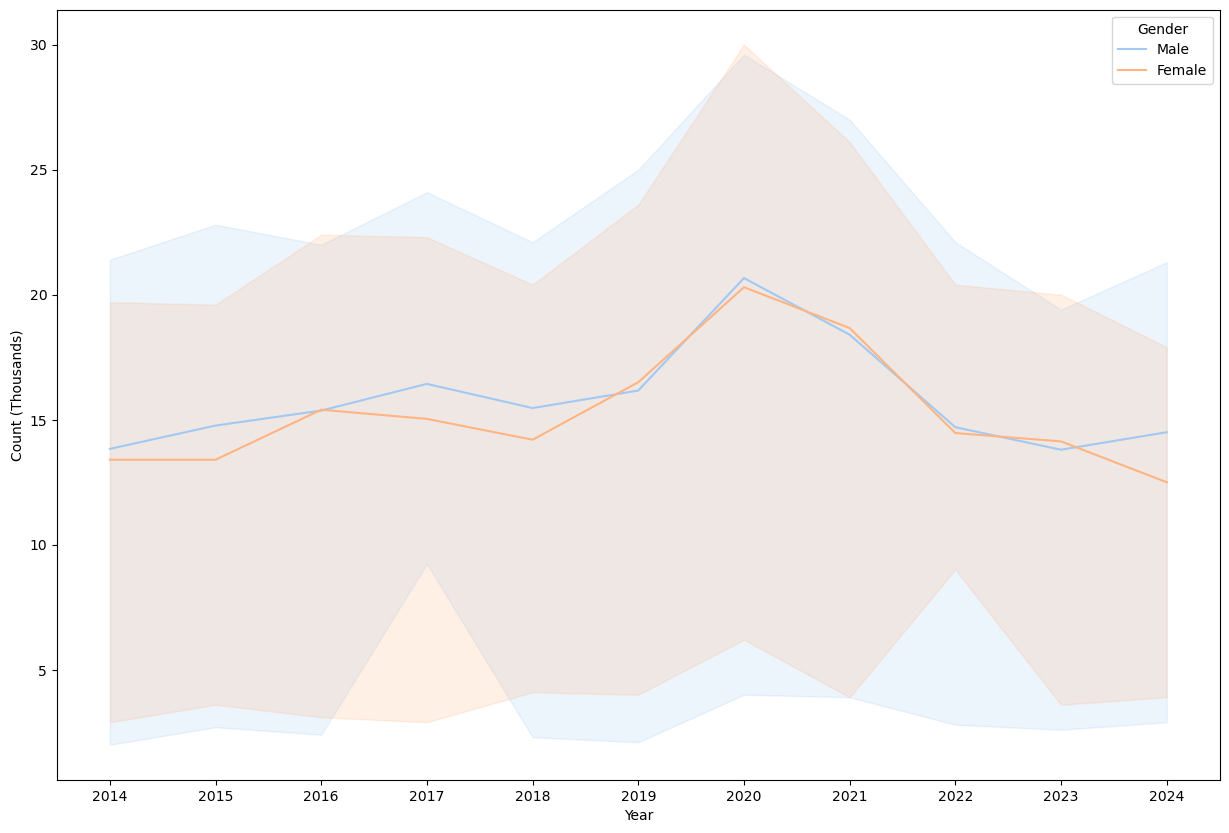

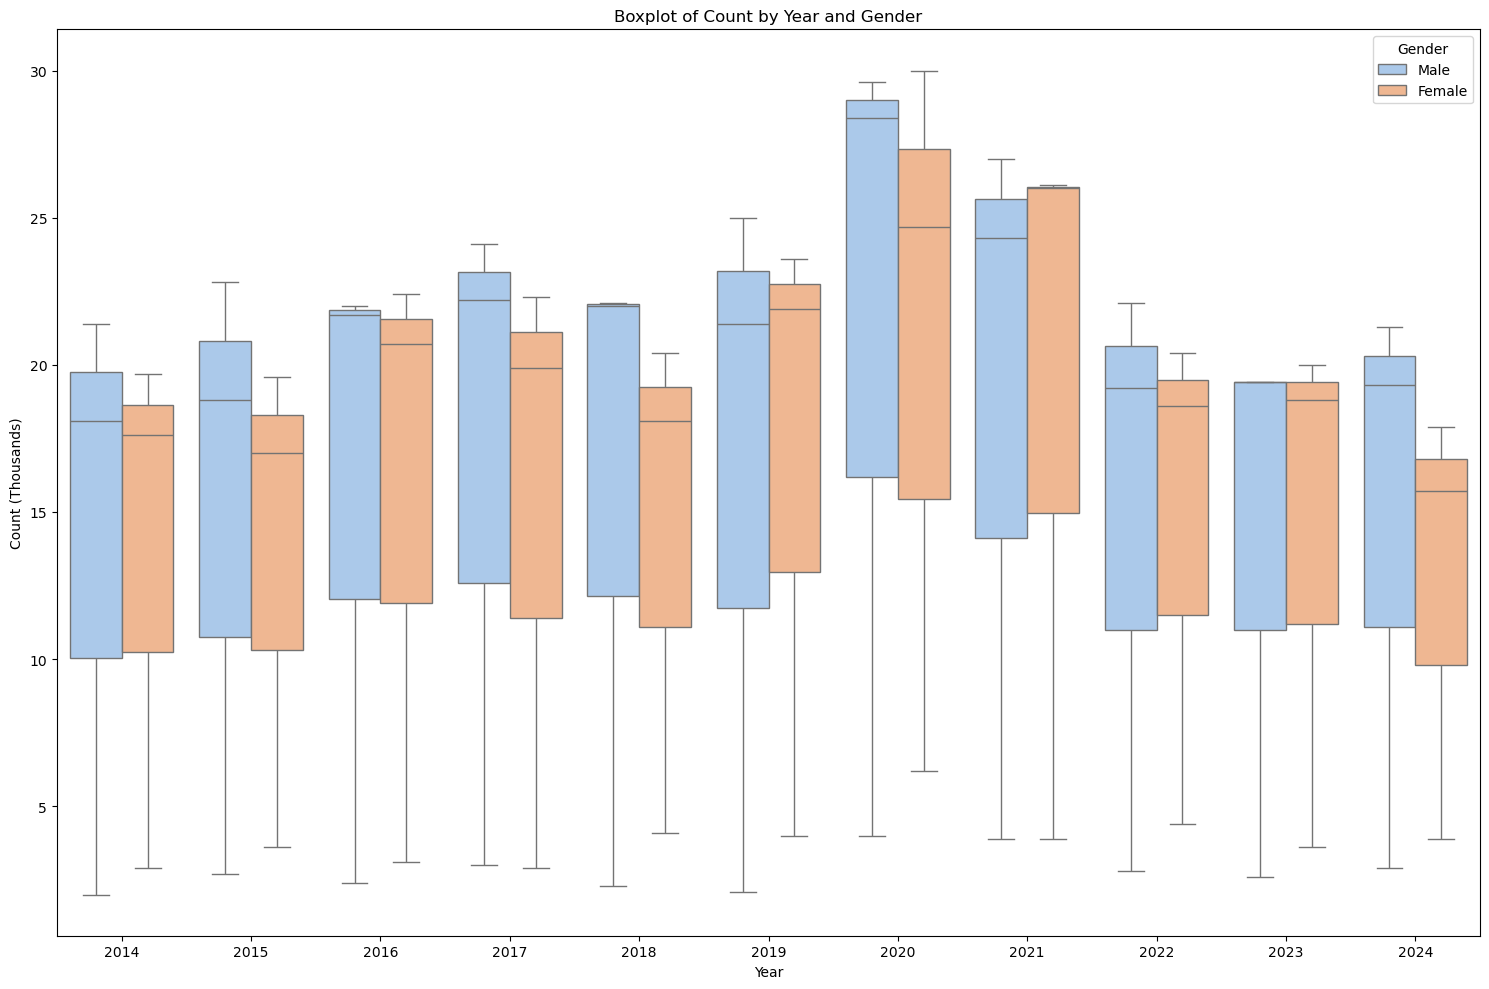

In [6]:
for i, col in enumerate(cat_list):
    # x-axis to be Year
    # y-axis to be Count

    ###---------------------------------------------------------------------------####
    ### ---- Line Plot – Shows mean trend over years for each category in col --- ####
    ###---------------------------------------------------------------------------####

    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel', estimator='mean')
    plt.xlabel('Year')
    plt.ylabel("Count (Thousands)")
    plt.show()

    ###---------------------------------------------------------------------------####
    ### ---- Box Plot – Shows trend over years for each category in col --- ####
    ###---------------------------------------------------------------------------####
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Year', y='Count', hue=col, data=df_long, palette='pastel')
    plt.xlabel('Year')
    plt.ylabel('Count (Thousands)')
    plt.title(f'Boxplot of Count by Year and {col}')
    #plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
    plt.tight_layout()
    plt.show()


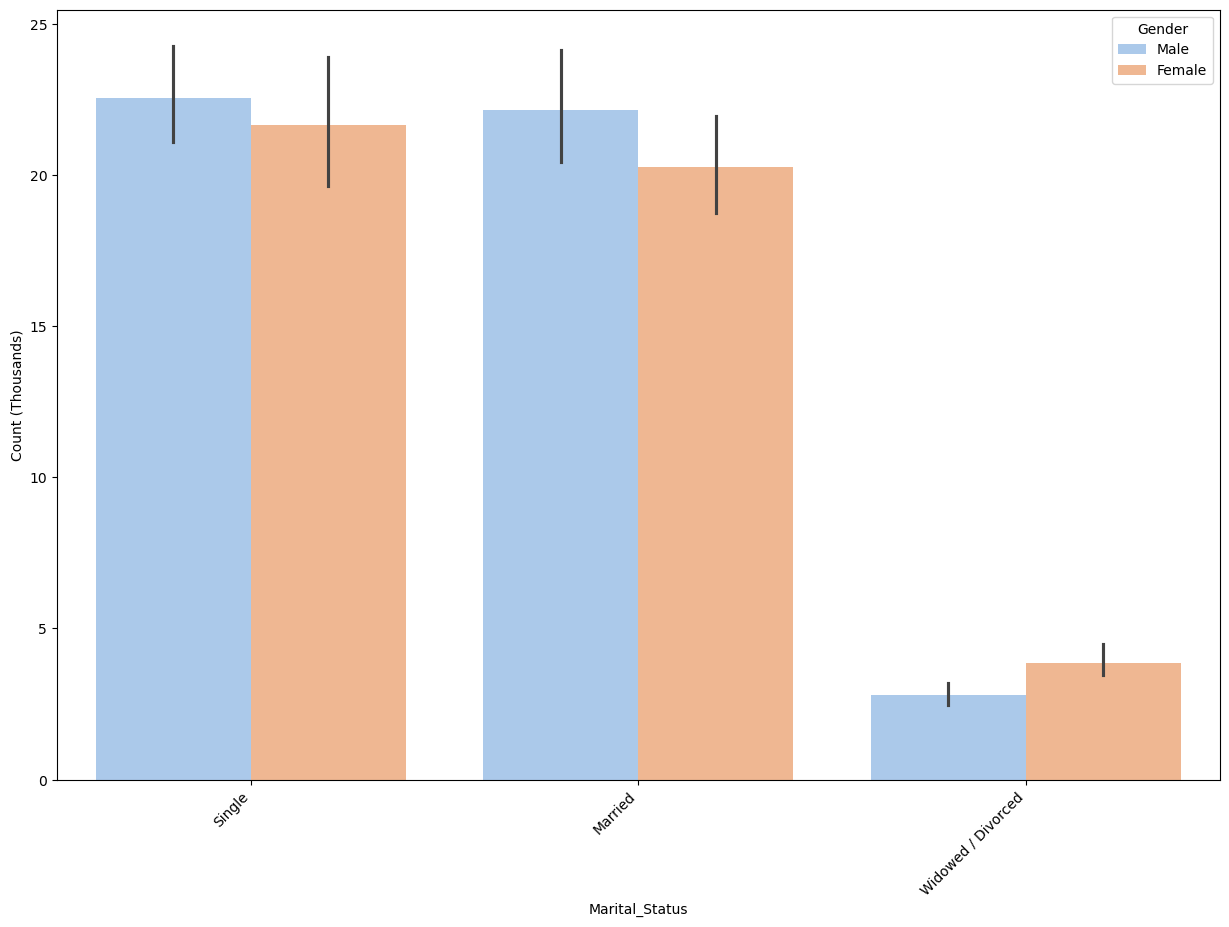

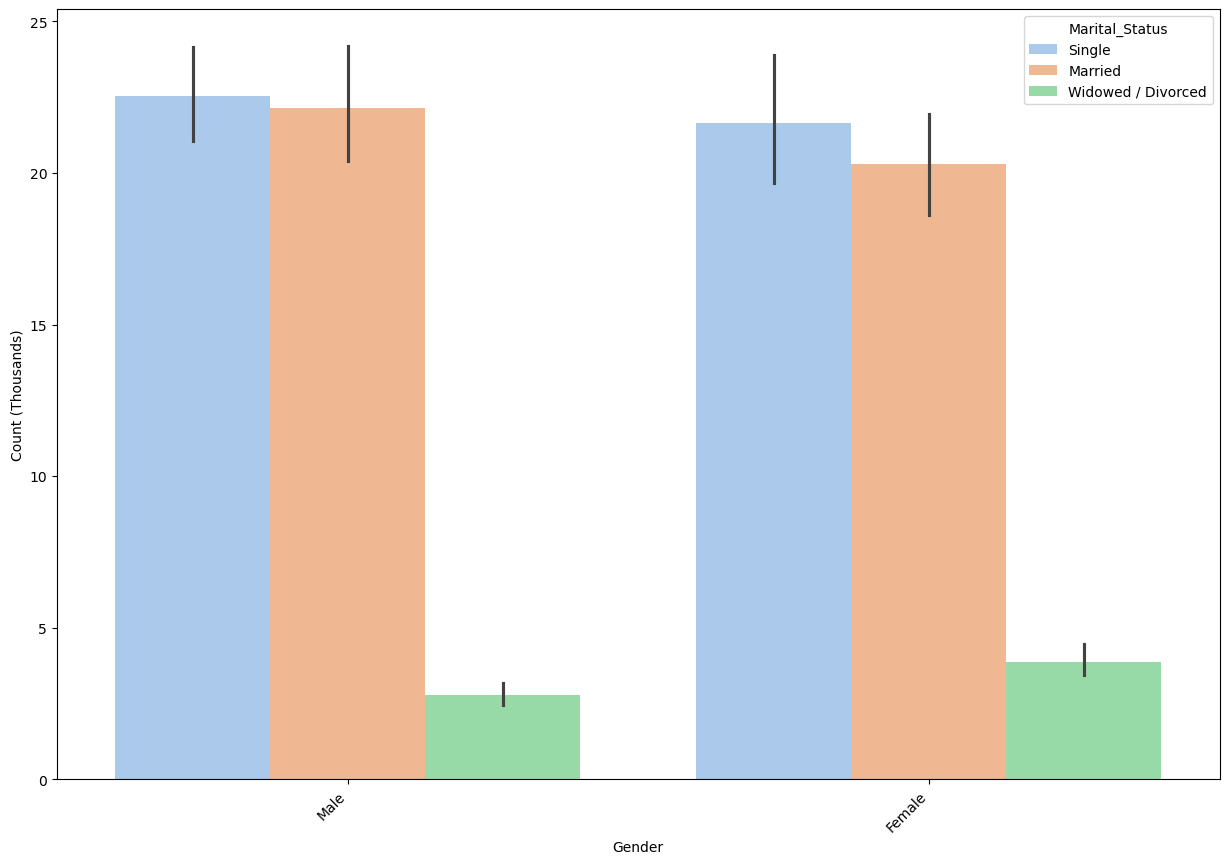

In [7]:
if len(cat_list)>1:
    combo_list = list(combinations(cat_list, 2))  
    # print(combo_list)

    ###-----------------------------------------------------------------------------------------####
    ### ---- Bar Plots – Show mean count comparisons between pairs of categorical variables --- ####
    ###-----------------------------------------------------------------------------------------####

    for combo in combo_list:
        plt.figure(figsize=(15, 10))
        sns.barplot(x=combo[0], y='Count', hue=combo[1], data=df_long, palette='pastel', estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(combo[0])
        plt.ylabel("Count (Thousands)")
        plt.show()

        plt.figure(figsize=(15, 10))
        sns.barplot(x=combo[1], y='Count', hue=combo[0], data=df_long, palette='pastel', estimator='mean')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(combo[1])
        plt.ylabel("Count (Thousands)")
        plt.show()



### Multivariate Analysis